<a href="https://colab.research.google.com/github/rida-manzoor/ML/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree**


### Learning Agenda of this notebook


*   Theory and intuition behind Decision Tree
    *   Example 1
    *   Example 2 (Numerical columns)
    *   Pros and cons of DT
*   Decision Tree Working
    * Entropy
    * Information Gain
    * GINI Impurity
*   Handling numerical data
*   Overfitting and underfitting in DT
*   Regression Tree




## 1. Theory and Intuition behind Decision Tree
> Decision Trees are non-parametric supervisied learning method used for classifcation and regression. The goal is to create a model that predicts the value of target variable by learning simple decision rules inferred data features.

[Classification Based on Decision Tree Algorithm for Machine Learning](https://www.jastt.org/index.php/jasttpath/article/view/65)

Mathematically, Decision trees use hyperplanes which run parallel to any one of the axes to cut cordinate system into hyper cuboids.

*   **Applications of Decision Trees:**

      * Credit Risk Detection
      * Client Subscription
      * Fraud Detection
      * Financial Risk Assessment
      * Product Quality Control
      * Marketing Compaign optimization
      * Client Subscription




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('dt.csv')
df

,gender,occupation,app
0,f,student,pubg
1,f,programmer,github
2,f,student,whatsapp
3,m,student,pubg
4,f,programmer,github
5,m,programmer,whatsapp
6,m,programmer,github
7,m,student,pubg
8,f,student,whatsapp
9,m,programmer,github



```
if occupation == programmer:
  print("github")
elif gender == m:
  print("pubg")
else:
  print("whatsapp")
  ```


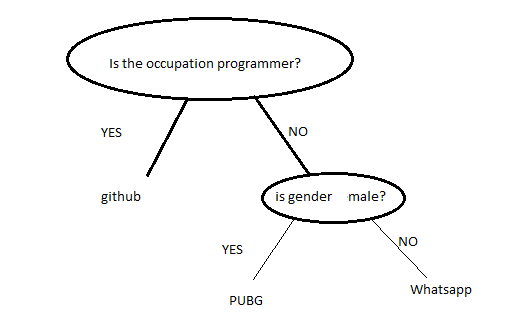

### Example 2

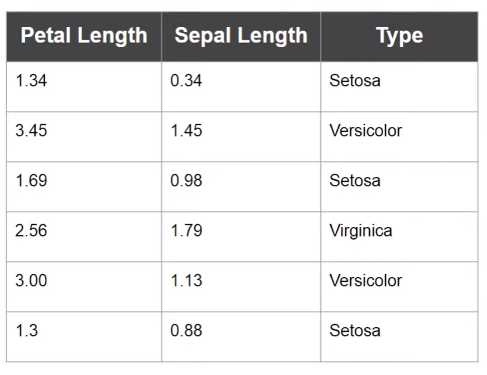




```
if PL < 2.0:
  print("Setosa")
elif SL < 1.5:
  print("Versicolor")
else:
  print("Virginica")
```




## Geometric Intuition
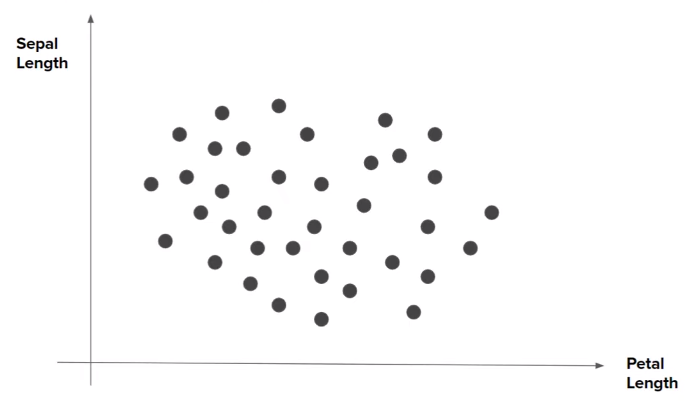

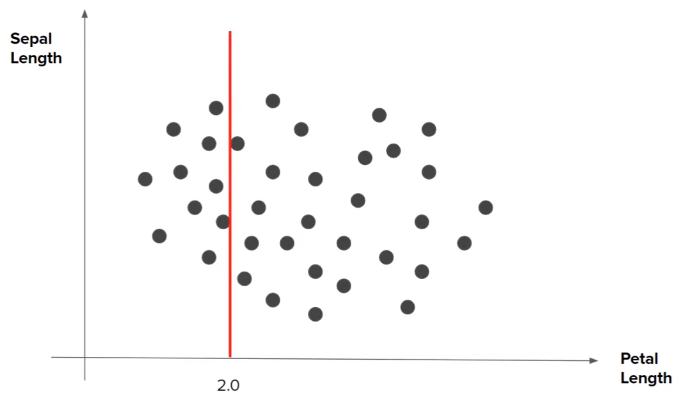

This will act as first splitting createria

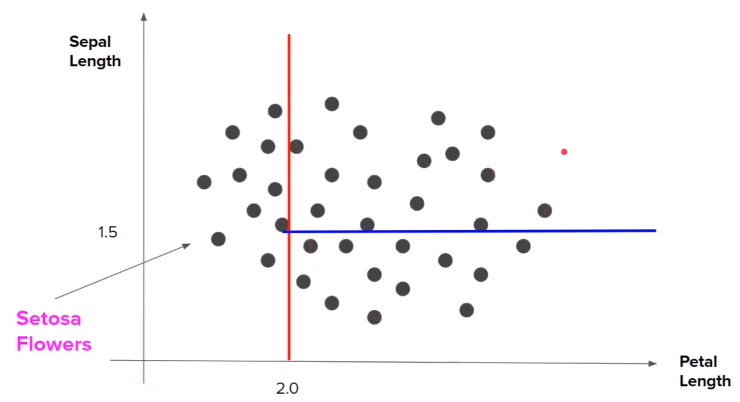

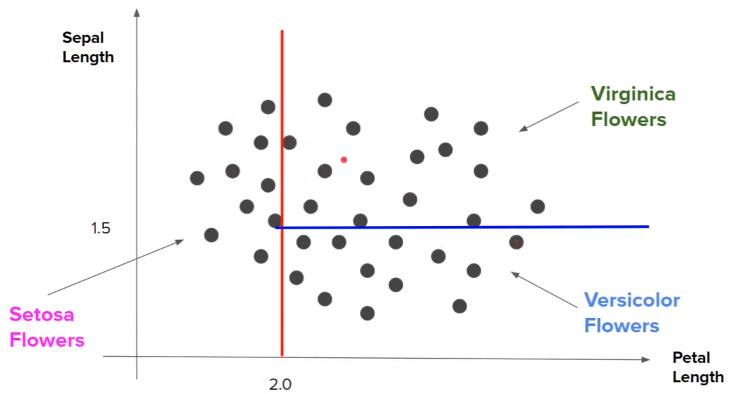

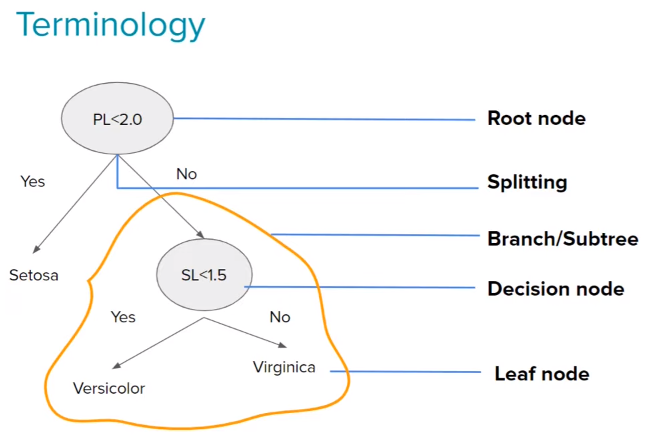


[KrishNaik](youtube.com/krishnaik)

**Questions to ask:**



1.   How to decide which column should be taken as root node?
2.   How to select sebsquent decision node?
3.   How to decide splitting criteria in case of numerical column?


We will discuss these questions afterward.



---



**Advantages of Decision Tree**


1.   Intuitive and easy to understand
2.   Required little data preparation
3.   Able to handle both numeric and categorical data
4.   Can handle multi-class problems
5.   Computationally inexpensive
6.   Works well for both linear and non-linear data
7.   Robust to correlated variables.



**Disadvantages of Decision Tree**


1.   Overfitting
2.   Prone to errors for imbalance dataset
3.   Can be unstable. This problem is mitigated by using decision trees within an ensemble.
4.   Multicollinearity among variables.





## Decision Tree Assumptions:



1.   Binary Split
2.   Recursive Partitioning
3.   Feature Independence
4.   Homogenity
5.   Top down greedy approach
6.   No missing values
7.   Equal Importance of Features
8.   No Outliers





## 2. How Decision Trees Work?

**Entropy:** Measure of purity/impurity

*   More knowledge less entropy
*   For binary classification entropy Values ranges between 0 and 1
*   For multiclass classification, entropy value can be greater than one.
*   It is pure split if entropy is zero
*   Entropy helps to decide whether this is pure split or not, ot it is leaf node or not.


Mathematical formula:

$$
E(S) = \sum_{i=1}^{c} -p_i log_2 p_i
$$





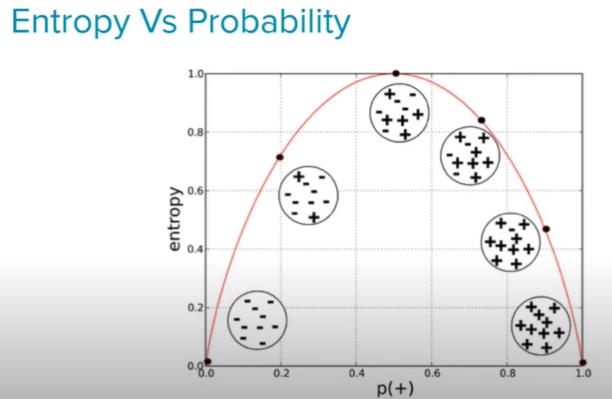

For all negative points:<br>
$$
E(N) = \frac{0}{10} log (\frac{0}{10}) - \frac{10}{10} log (\frac{10}{10})
     = 0
$$

For 2 positive and 8 negative points:
$$
E(N) = \frac{2}{10} log (\frac{2}{10}) - \frac{8}{10} log (\frac{8}{10})
     = 0.7
$$
For 5 positive and 5 negative points:
$$
E(N) = \frac{5}{10} log (\frac{5}{10}) - \frac{5}{10} log (\frac{5}{10})
     = 1
$$
For 7 positive and 3 negative points:
$$
E(N) = \frac{7}{10} log (\frac{7}{10}) - \frac{3}{10} log (\frac{3}{10})
     = 0.83
$$
For 9 positive and 1 negative points:
$$
E(N) = \frac{9}{10} log (\frac{9}{10}) - \frac{1}{10} log (\frac{1}{10})
     = 0.45
$$

> For continuous output column, graph with less peaked has higher entropy.

<br>

**Information Gain**

It is a metric that is used to train decision tree. It is based on decrease in entropy after a data split on an column. Building a decision tree is all about finding column that returns highest information gain.

Mathematically,

$$
Information Gain = E(Y) - E(Y|X)
$$

<br><br>
> Column with higher information gain will be selected to split data based on that column.

> Information gain is calculated recursively at every level.


<br><br>
**Can Information Gain be used to specify root node?**
<br> Yes, IG can be use to determine root node. (See Below numeric example)

**GINI Impurity**

For classification problem, sklearn use gini inpurity as default.

$$
G = 1 - (Py^2 +Pn^2)
$$


. Computationally faster than entropy.

. It's value ranges between 0 and 0.5

[Theoretical comparison between the Gini Index and
Information Gain criteria](https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf)

### 3. Handling numerical data

If we have a data with numeric features and data has n rows. If no numeric value is repeated thats mean we have n unqiure values. So, if we split data based on each tree we will get n subtrees. It will be computationally expensive.

**Solution:**

**Step 1:**  Sort data based on numeric column

**Step 2:**  Split entire data on basis of every value of numeric column

**Step 3:**  Find entropy of each child dataset

**Step 4:**  Find weighted entropy of E1, E2 for all splits and calculate information gain.

**Step 5:**  Max{IG1, IG2, IG3,...., IGn}

**Step 6:**  Do it recursively until you find leave node.


Testing time complexity:  log(n)

In [2]:
import pandas as pd
import numpy as np

# Creating a sorted dataset
np.random.seed(42)
numeric_column = np.random.randint(1, 100, 15)
target_column = np.random.choice([0, 1], size=15)
dataset_df = pd.DataFrame({'NumericColumn': numeric_column, 'TargetColumn': target_column})
sorted_dataset_df = dataset_df.sort_values(by='NumericColumn')

# Function to calculate entropy
def calculate_entropy(data):
    class_counts = data['TargetColumn'].value_counts()
    total_samples = len(data)
    entropy = 0
    for count in class_counts:
        p = count / total_samples
        entropy -= p * np.log2(p)
    return entropy

# Initialize variables to store results
split_points = []
entropies_left = []
entropies_right = []
weighted_entropies = []
information_gains = []

# Iterate through each record and calculate metrics for the split
for i in range(1, len(sorted_dataset_df)):
    # Consider splitting at the current record
    split_value = sorted_dataset_df['NumericColumn'].iloc[i]

    # Split the dataset into two parts based on the current split value
    left_split = sorted_dataset_df[sorted_dataset_df['NumericColumn'] <= split_value]
    right_split = sorted_dataset_df[sorted_dataset_df['NumericColumn'] > split_value]

    # Calculate the entropy of each child dataset
    entropy_left = calculate_entropy(left_split)
    entropy_right = calculate_entropy(right_split)

    # Calculate the weighted entropy of E1 and E2
    total_samples = len(sorted_dataset_df)
    weight_left = len(left_split) / total_samples
    weight_right = len(right_split) / total_samples

    weighted_entropy = (weight_left * entropy_left) + (weight_right * entropy_right)

    # Calculate information gain
    entropy_original = calculate_entropy(sorted_dataset_df)
    information_gain = entropy_original - weighted_entropy

    # Store the results for the current split
    split_points.append(split_value)
    entropies_left.append(entropy_left)
    entropies_right.append(entropy_right)
    weighted_entropies.append(weighted_entropy)
    information_gains.append(information_gain)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Split Point': split_points,
    'Entropy Left': entropies_left,
    'Entropy Right': entropies_right,
    'Weighted Entropy': weighted_entropies,
    'Information Gain': information_gains
})

# Display the results
print(results_df)


    Split Point  Entropy Left  Entropy Right  Weighted Entropy  \
0            15      0.000000       0.779350          0.675437   
1            21      0.000000       0.811278          0.649022   
2            22      0.811278       0.684038          0.717969   
3            24      0.721928       0.721928          0.721928   
4            52      0.650022       0.764205          0.718532   
5            53      0.591673       0.811278          0.708796   
6            61      0.543564       0.863121          0.692691   
7            72      0.503258       0.918296          0.669273   
8            75      0.845351       0.000000          0.619924   
9            75      0.845351       0.000000          0.619924   
10           83      0.811278       0.000000          0.649022   
11           87      0.779350       0.000000          0.675437   
12           88      0.749595       0.000000          0.699622   
13           93      0.721928       0.000000          0.721928   

    Infor

In [3]:
# Sort the results DataFrame based on the 'Information Gain' column in descending order
sorted_results_df = results_df.sort_values(by='Information Gain', ascending=False)

# Display the sorted results DataFrame
print(sorted_results_df)

    Split Point  Entropy Left  Entropy Right  Weighted Entropy  \
8            75      0.845351       0.000000          0.619924   
9            75      0.845351       0.000000          0.619924   
1            21      0.000000       0.811278          0.649022   
10           83      0.811278       0.000000          0.649022   
7            72      0.503258       0.918296          0.669273   
0            15      0.000000       0.779350          0.675437   
11           87      0.779350       0.000000          0.675437   
6            61      0.543564       0.863121          0.692691   
12           88      0.749595       0.000000          0.699622   
5            53      0.591673       0.811278          0.708796   
2            22      0.811278       0.684038          0.717969   
4            52      0.650022       0.764205          0.718532   
3            24      0.721928       0.721928          0.721928   
13           93      0.721928       0.000000          0.721928   

    Infor

**Overfitting**

perform good on training data, bad on testing data.

> Usually there are higher chances of overfitting when we pass None to Max_depth parameter. That mean algorithm will split data until it find all leaf nodes.

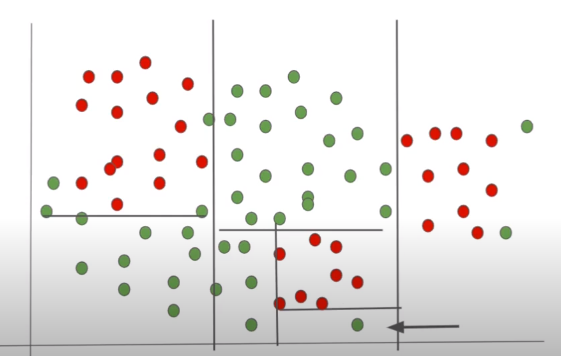

**Underfitting**

perform bad on training and testing data.

> Usually there are higher chances of underfitting when we pass 1 to Max_depth parameter.


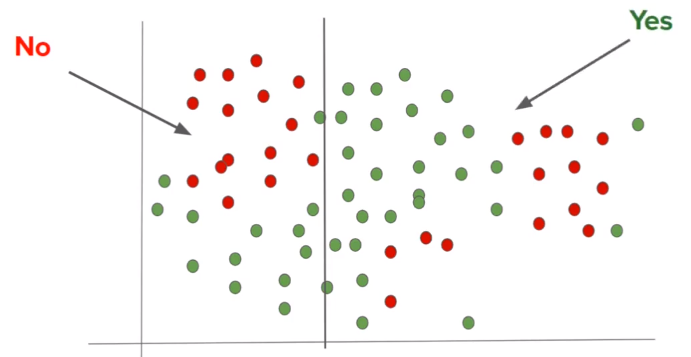

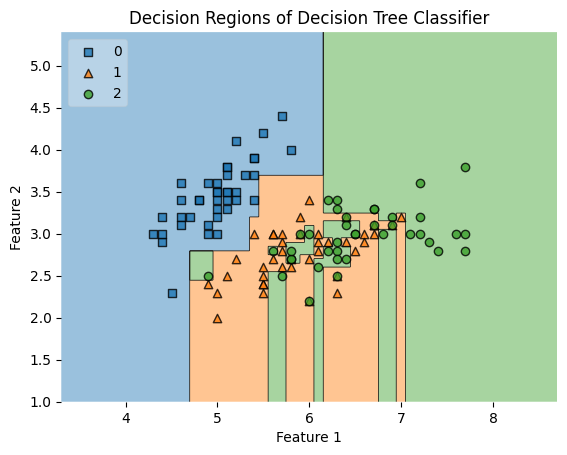

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features for simplicity
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=None)
clf.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=clf, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions of Decision Tree Classifier')
plt.show()


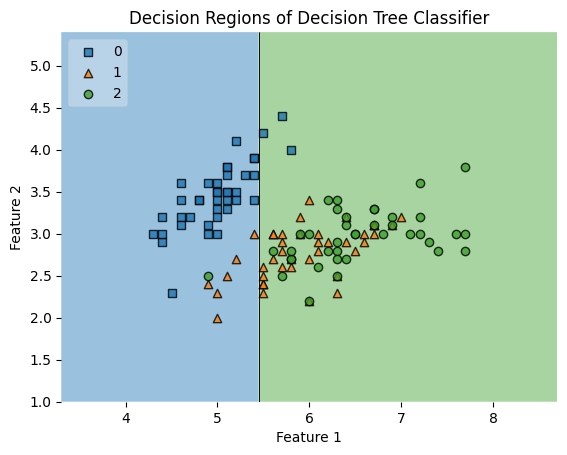

In [ ]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=clf, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions of Decision Tree Classifier')
plt.show()


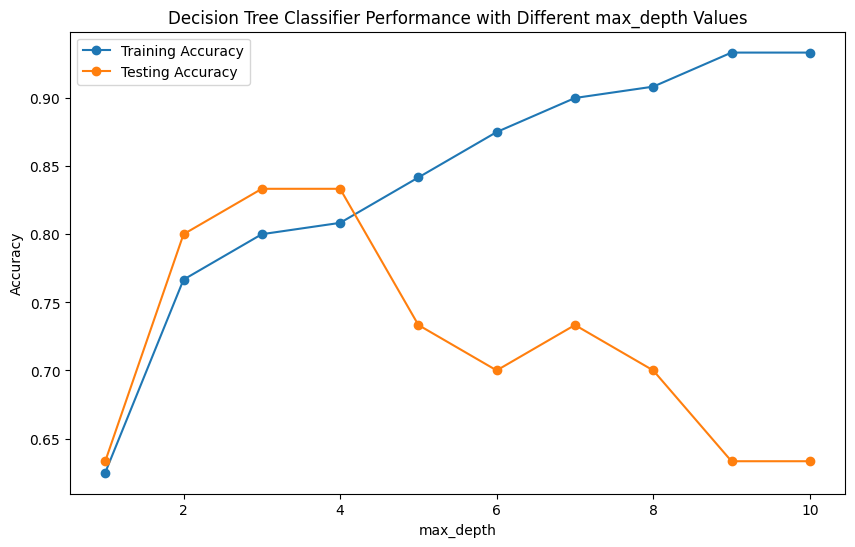

In [ ]:
# Try different values of max_depth
max_depth_values = range(1, 11)
train_accs = []
test_accs = []

# Train decision tree classifiers for each max_depth value
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)

    # Calculate training accuracy
    train_acc = clf.score(X_train, y_train)
    train_accs.append(train_acc)

    # Calculate testing accuracy
    test_acc = clf.score(X_test, y_test)
    test_accs.append(test_acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accs, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, test_accs, label='Testing Accuracy', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Performance with Different max_depth Values')
plt.legend()
plt.show()

In [ ]:
import graphviz.backend as be

from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image,display_svg, SVG
from sklearn import tree

In [ ]:
clas = tree.DecisionTreeClassifier(max_depth=2)
iris = load_iris()


x_train = iris.data
y_train = iris.target
clas.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

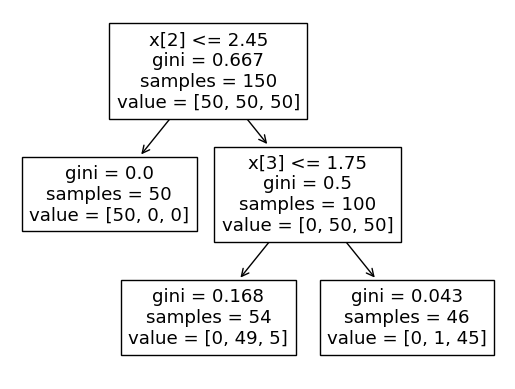

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clas)

**Example 1**

In [11]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
pima = pima.drop(0, axis=0)  # Drop the first row by index

In [ ]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, splitter='best')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7878787878787878


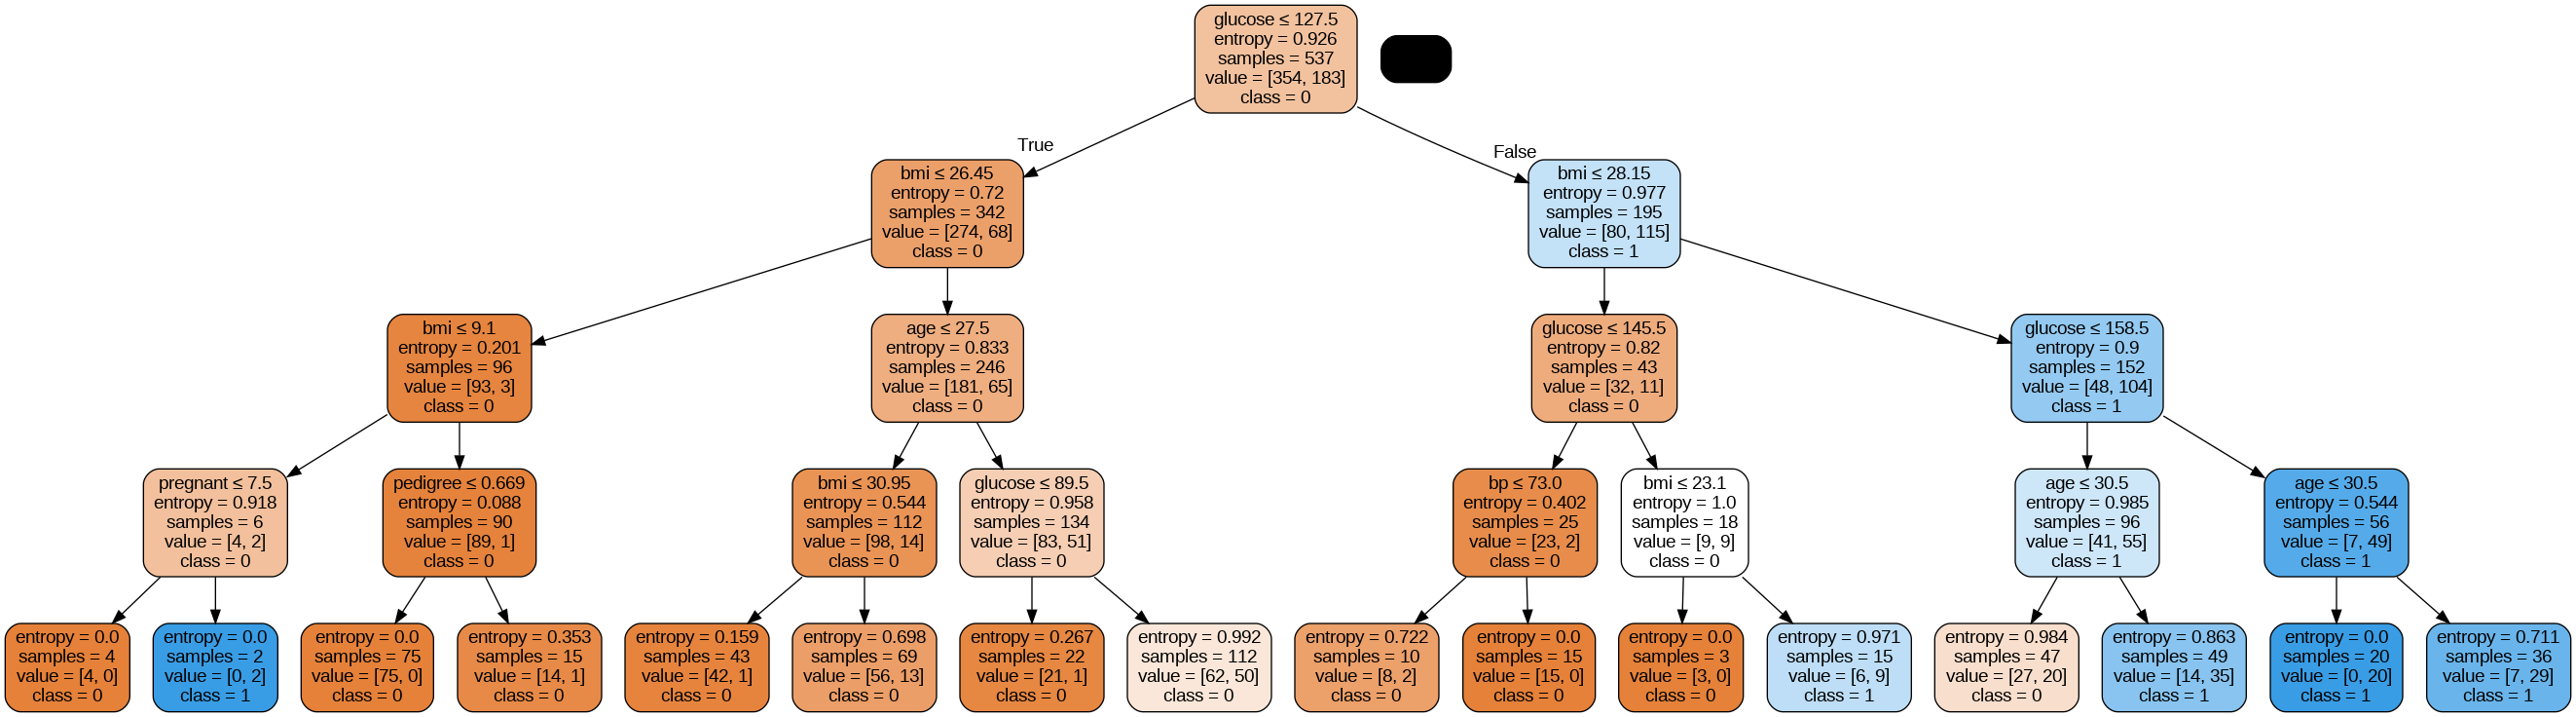

In [ ]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

### 4. Regression Tree

> Regression trees are decision trees that are applied on regression problems.

Alot of regression problems can be solved using linear regression. So the question arises here, why we need regression trees?


1.   Non-linearity in Data:

    Linear regression assumes a linear relationship between the independent and dependent variables. If the true relationship is nonlinear, linear regression may not capture it effectively. Regression trees are capable of modeling complex, non-linear relationships in the data.
2.   Interactions and Heterogeneity:

    Trees can capture interactions between variables and handle situations where the relationship between the independent variables and the dependent variable varies across different subgroups of the data. Linear regression may struggle with such interactions and heterogeneity.
3.  Ensemble Methods:

    Regression trees can be combined into ensemble methods like Random Forests or Gradient Boosted Trees, which often result in improved predictive performance compared to individual trees or linear regression models.


> While linear regression models can be used in ensemble methods, they are not as commonly employed as base learners in traditional ensemble techniques like Random Forests or Gradient Boosting. The reason for this is that these ensemble methods are typically designed to work with models that exhibit diversity, meaning they make different types of errors on the data. Linear regression models, being linear and additive in nature, may not provide enough diversity when combined in an ensemble. Each linear model in the ensemble would contribute in a similar way, and the overall model may not capture complex relationships or patterns as effectively as an ensemble of diverse models.


If the target is a continuous value, then for node *m*
, common criteria to minimize as for determining locations for future splits are Mean Squared Error (MSE or L2 error), Poisson deviance as well as Mean Absolute Error (MAE or L1 error). MSE and Poisson deviance both set the predicted value of terminal nodes to the learned mean value
 of the node whereas the MAE sets the predicted value of terminal nodes to the median
.

In [5]:
df = pd.read_csv('advertising4D.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df['label'] = df['sales'].astype(int)

# Display the DataFrame
print(df)


        TV  radio  newspaper  sales  label
0    230.1   37.8       69.2   22.1     22
1     44.5   39.3       45.1   10.4     10
2     17.2   45.9       69.3    9.3      9
3    151.5   41.3       58.5   18.5     18
4    180.8   10.8       58.4   12.9     12
..     ...    ...        ...    ...    ...
195   38.2    3.7       13.8    7.6      7
196   94.2    4.9        8.1    9.7      9
197  177.0    9.3        6.4   12.8     12
198  283.6   42.0       66.2   25.5     25
199  232.1    8.6        8.7   13.4     13

[200 rows x 5 columns]


In [8]:
feature_cols = ['TV','radio','newspaper']
X = df[feature_cols]
y = df.label

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X = scaler.fit_transform(X)
X

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

[Text(0.5, 0.875, 'x[0] <= -0.245\nsquared_error = 28.321\nsamples = 140\nvalue = 13.329'),
 Text(0.25, 0.625, 'x[0] <= -1.366\nsquared_error = 8.172\nsamples = 63\nvalue = 9.286'),
 Text(0.125, 0.375, 'x[2] <= -0.746\nsquared_error = 4.21\nsamples = 18\nvalue = 6.111'),
 Text(0.0625, 0.125, 'squared_error = 2.24\nsamples = 5\nvalue = 3.6'),
 Text(0.1875, 0.125, 'squared_error = 1.609\nsamples = 13\nvalue = 7.077'),
 Text(0.375, 0.375, 'x[1] <= -0.663\nsquared_error = 4.114\nsamples = 45\nvalue = 10.556'),
 Text(0.3125, 0.125, 'squared_error = 1.0\nsamples = 20\nvalue = 9.0'),
 Text(0.4375, 0.125, 'squared_error = 3.12\nsamples = 25\nvalue = 11.8'),
 Text(0.75, 0.625, 'x[1] <= 0.242\nsquared_error = 20.491\nsamples = 77\nvalue = 16.636'),
 Text(0.625, 0.375, 'x[1] <= -0.899\nsquared_error = 3.874\nsamples = 39\nvalue = 12.846'),
 Text(0.5625, 0.125, 'squared_error = 0.76\nsamples = 20\nvalue = 11.2'),
 Text(0.6875, 0.125, 'squared_error = 1.296\nsamples = 19\nvalue = 14.579'),
 Text(0.

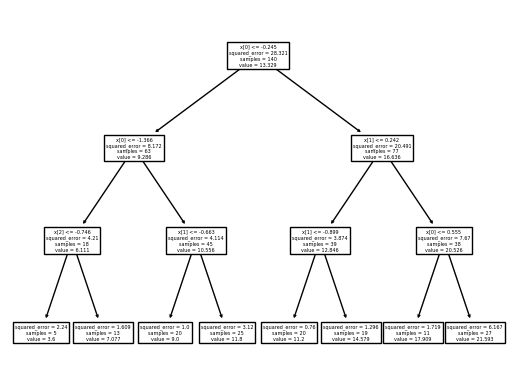

In [18]:
from sklearn.tree import plot_tree

plot_tree(model)

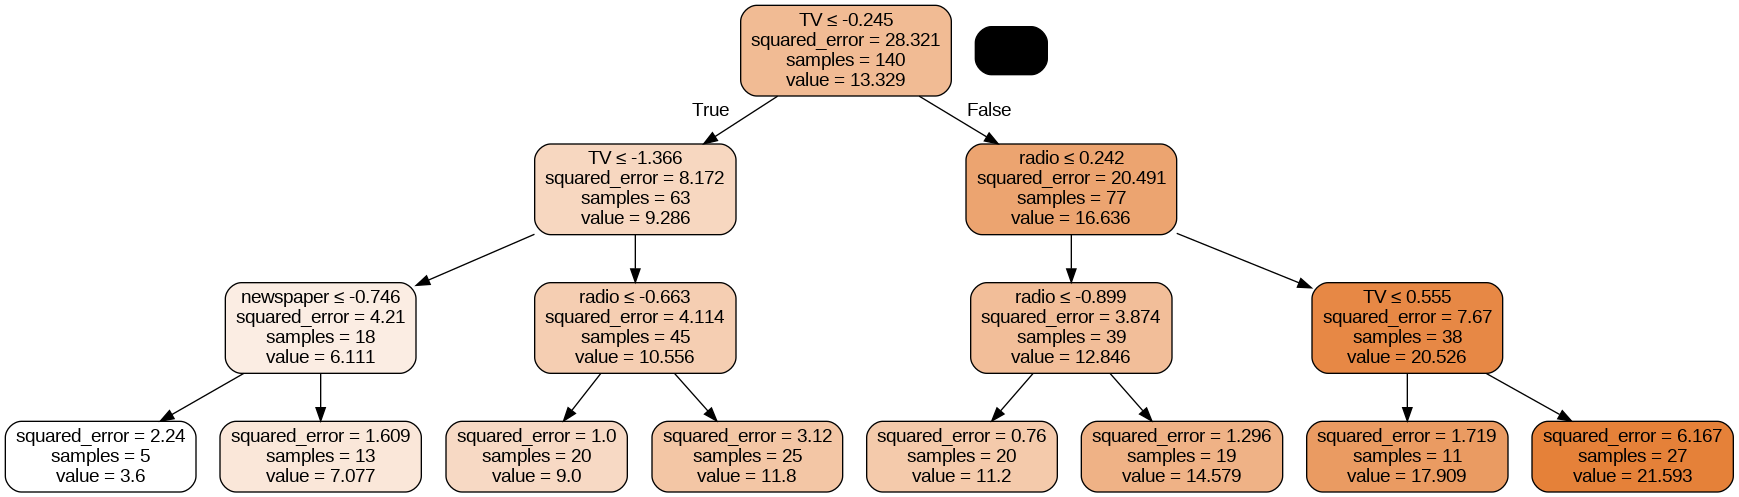

In [19]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [21]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.6097435897435897


## Hyperparameter Tuning

In [ ]:
# Creating dictionary of parameters we want to fine tune
param_dist = {
    "criterion": ['absolute_error','poisson','friedman_mse','squared_error'],
    "max_depth": [1,2,3,4,5,6,7,None]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,
                    param_grid = param_dist,
                    cv=10,
                    n_jobs=-1)


In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['absolute_error', 'poisson',
                                       'friedman_mse', 'squared_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [ ]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=7)

In [ ]:
grid.best_score_

0.931729234305041

In [ ]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 7}

## **Pruning**

Pruning is another method that can help us avoid overfitting. It helps in improving the performance of the tree by cutting the nodes or sub-nodes which are not significant. Additionally, it removes the branches which have very low importance.

There are mainly 2 ways for pruning:

**Pre-pruning** – we can stop growing the tree earlier, which means we can prune/remove/cut a node if it has low importance while growing the tree.

**Post-pruning** – once our tree is built to its depth, we can start pruning the nodes based on their significance.

*Source: Analytic Vidhya*